In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [4]:
wnba = pd.read_csv('/Users/user/Desktop/Statistics/WNBA Player Stats/WNBA Stats.csv')

In [5]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [6]:
wnba.shape

(143, 32)

In [8]:
parameter = wnba["Games Played"].max()

In [9]:
parameter

32

In [15]:
sample = wnba.sample(30, random_state=1)

In [16]:
statistic = sample["Games Played"].max()

In [17]:
statistic

30

In [19]:
sampling_error = parameter - statistic
sampling_error

2

Using simple random sampling, take 100 samples of 10 values each from our WNBA data set, and for each sample, measure the average points scored by a player during the 2016-2017 season. For each of the 100 iterations of a for loop, do the following:

* Sample 10 values from the PTS column.
* Compute the mean of this sample made of 10 values from the PTS column, and append the result to a list.
* To make your results reproducible, vary the random_state parameter of the sample() method with values between 0 and 99. For the first iteration of the for loop, random_state should equal 0, for the second iteration should equal 1, for the third should equal 2, and so on.

In [82]:
sample_means = []
population_mean = wnba["PTS"].mean()

for i in range(100):
    pts_mean = wnba["PTS"].sample(10, random_state=i).mean()
    sample_means.append(pts_mean)

Display the discrepancy between the parameter of interest (the mean of the PTS column) and the statistics obtained in the previous step.

* Using plt.scatter(), display all the 100 sample means using a scatter plot. For the x-axis, use integers from 1 to 100 to designate the sample number. Use the y-axis for the sample means.
* Using plt.axhline(), draw a horizontal line that represents the average number of points for the population.
* Use plt.show() to display the plot.


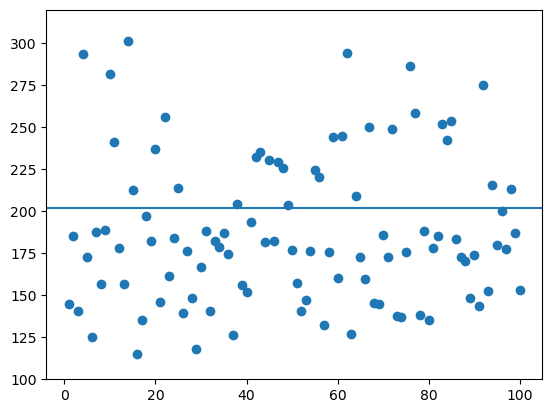

In [83]:
plt.scatter(range(1,101), sample_means)
plt.axhline(population_mean)
plt.ylim([100, 320])
plt.show()

## The Importance of Sample Size

On the scatter plot from the previous screen, we can see that the sample means vary a lot around the population mean. With a minimum sample mean of 115 points, a maximum of 301.4, and a population mean of roughly 201.8, we can tell that the sampling error is quite large for some of the cases.

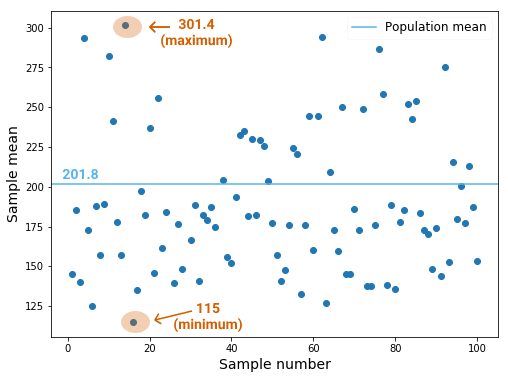

Because sample means vary a lot around the population mean, there's a good chance we get a sample that isn't representative of the population:

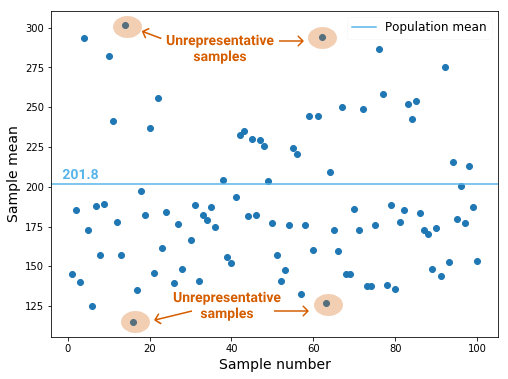

We can solve this problem by increasing the sample size. As we increase the sample size, the sample means vary less around the population mean, and the chances of getting an unrepresentative sample decrease.

In the previous exercise, we took 100 samples, and each had a sample size of 10 units. Here is what happens when we repeat the procedure but increase the size of the samples:

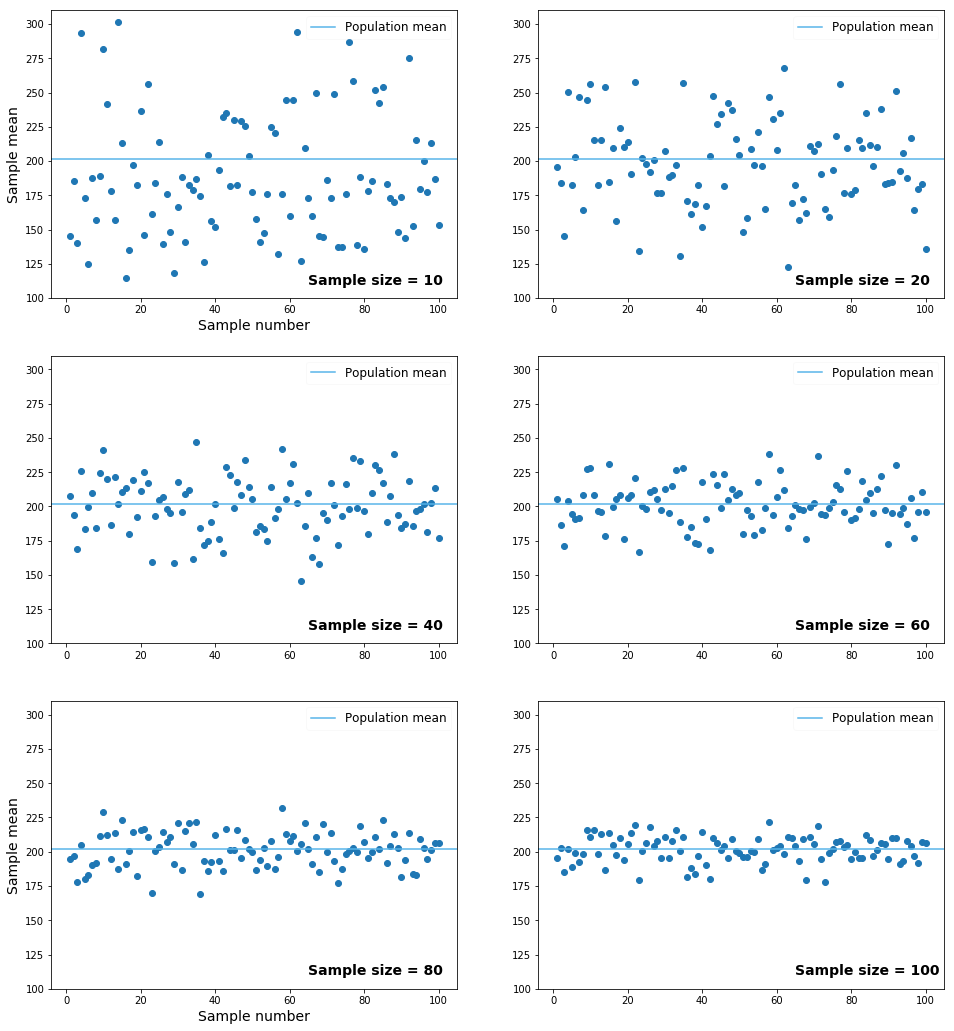

We can see how sample means tend to vary less around the population mean as we increase the sample size. From this observation we can make two conclusions:

* Simple random sampling isn't a reliable sampling method when the sample size is small. Because sample means vary a lot around the population mean, there's a good chance we'll get an unrepresentative sample.

* When we do simple random sampling, we should try to get a sample that is as large as possible. A large sample decreases the variability of the sampling process, which, in turn, decreases the chances that we'll get an unrepresentative sample.

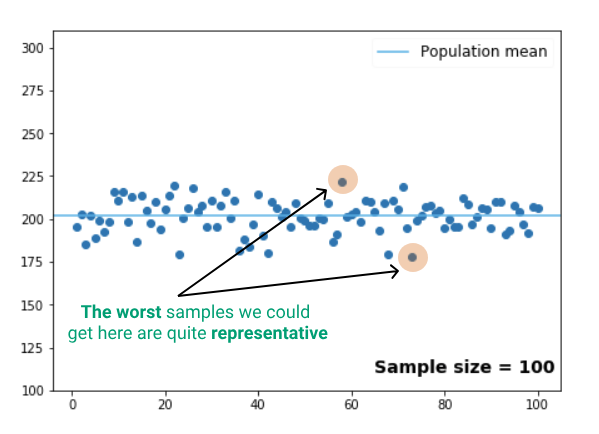

## Stratified Sampling

Because simple random sampling is entirely random, it can exclude certain population individuals who are relevant to some of our questions.

For example, players in basketball play in different positions on the court. The metrics of a player (number of points, number of assists, etc.) depend on their position, and we might want to analyze the patterns for each individual position. If we perform simple random sampling, there's a chance that our sample won't include some categories. In other words, it's not guaranteed that we'll have a representative sample that has observations for every position we want to analyze.

There are five unique positions in our data set:

In [84]:
wnba["Pos"].unique()

array(['F', 'G/F', 'G', 'C', 'F/C'], dtype=object)

Let's quickly decipher each abbreviation:

Abbreviation	Full name
F	Forward
G	Guard
C	Center
G/F	Guard/Forward
F/C	Forward/Center

The downside of simple random sampling is that it can exclude individuals playing a certain position. Visually, and on a smaller scale, this is what could happen:

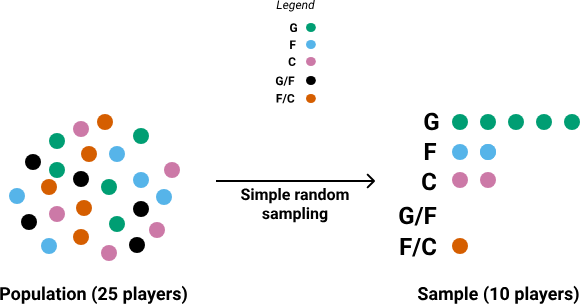

To ensure we end up with a sample that has observations for all the categories of interest, we can change the sampling method. We can organize our data set into different groups and then do simple random sampling for every group. We can group our data set by player position, and then sample randomly from each group.

Visually, and on a smaller scale, we need to do this:

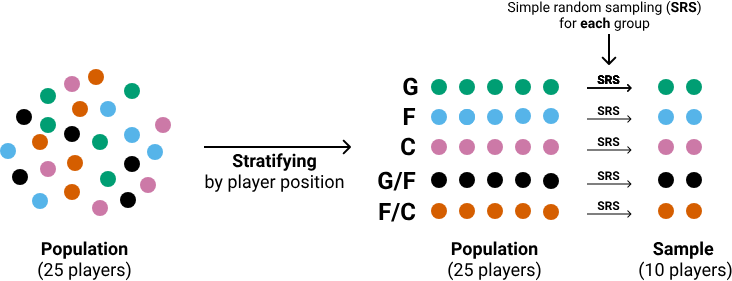

We call this sampling method stratified sampling, and we call each stratified group a stratum.



### Asignment
Perform stratified sampling: stratify the dataset by player position, and then do simple random sampling on every stratum. At the end, use the sample to determine which position scores the highest number of points per game.

* Create a new column that describes the number of points a player scored per game during the season. The number of total points a player scored during the entire season is in the PTS column, and the number of games played is in the Games Played column. Give the new column a relevant name.
* Stratify the wnba data set by player position. The Pos column describes a player's position. Assign each stratum to a different variable.
* Loop through the strata, and for each stratum, do the following:
    * Sample 10 observations using simple random sampling (set random_state = 0).
    * Find the mean points per game using the sample. Use the new column you created earlier.
    * Find a way to store the mean along with its corresponding position. You can use a dictionary.
* Find the position that scores the highest number of points per game, and assign its name to a variable named position_most_points.
    * To find the dictionary key that has the greatest dictionary value, you can use this technique.

In [86]:
wnba["PPG"] = wnba["PTS"] / wnba["Games Played"]
wnba["PPG"].head()

0    11.625000
1     7.233333
2     8.384615
3     6.064516
4     2.083333
Name: PPG, dtype: float64

In [90]:
# Stratifying the data in five strata
stratum_G = wnba[wnba["Pos"] == "G"]
stratum_F = wnba[wnba["Pos"] == "F"]
stratum_C = wnba[wnba["Pos"] == "C"]
stratum_GF = wnba[wnba["Pos"] == "G/F"]
stratum_FC = wnba[wnba["Pos"] == "F/C"]

In [91]:
points_per_position = {}

for stratum, position in [(stratum_G, 'G'), (stratum_F, 'F'), (stratum_C, 'C'), (stratum_GF, 'G/F'), (stratum_FC, 'F/C')]:
    sample = stratum['PPG'].sample(10, random_state=0)
    points_per_position[position] = sample.mean()
    
points_per_position

{'G': 7.092926195632343,
 'F': 8.702175158545568,
 'C': 9.833761394334251,
 'G/F': 6.817264935760487,
 'F/C': 9.059118773946361}

In [98]:
position_most_points = max(points_per_position, key = points_per_position.get)
position_most_points

'C'

### Explanation of code

The code follows the instructions to compute the average points per game (PPG) for each player in the WNBA dataset and then stratify the data into five strata based on player position (G, F, C, G/F, F/C).

Next, the code creates an empty dictionary called points_per_position to store the mean PPG for each position. It then loops through each stratum and position, takes a random sample of 10 players from the stratum, and calculates the mean PPG for that sample. The mean is then stored in the points_per_position dictionary with the position as the key.

Finally, the code uses the max() function to find the position with the highest mean PPG, which is stored in the variable position_most_points.

## Proportional Stratified Sampling

Earlier in this lesson, we performed simple random sampling 100 times on the original dataset, and for each sample, we computed the mean number of total points a player scores in a season. The problem is that the number of games played, which ranges from 2 to 32, influences the number of total points:

In [99]:
wnba['Games Played'].min()

2

In [100]:
wnba['Games Played'].max()

32

Approximately 72.7 percent of the players had more than 23 games for the 2016-2017 season, which means that this category of players who played many games probably influenced the mean. Let's take a look at the other percentages:

In [102]:
wnba['Games Played'].value_counts(bins=3, normalize=True) * 100

(22.0, 32.0]     72.727273
(12.0, 22.0]     18.181818
(1.969, 12.0]     9.090909
Name: Games Played, dtype: float64

As a side note on the output above, (1.969, 12.0], (12.0, 22.0] and (22.0, 32.0] are number intervals. The ( character indicates that the beginning of the interval isn't included, and the ] indicates that the endpoint is included. For example, (22.0, 32.0] means that 22.0 isn't included, while 32.0 is, and the interval contains this array of numbers: [23, 24, 25, 26, 27, 28, 29, 30, 31, 32].

Getting back to our discussion, when we compute the mean of the total points using the population (the entire dataset), those 72.7 percent of players who played more than 23 games will probably significantly influence the mean. However, when we sample randomly, we can end up with a sample where the proportions are different than in the population.

For instance, we might end up with a sample where only 2 percent of the players played more than 23 games. This will result in a sample mean that underestimates the population mean. Or we could have a sample where more than 95 percent of the players had 23 games in the 2016-2017 season. This will result in overestimating the population mean. This scenario of under- or overestimation is common for small samples.

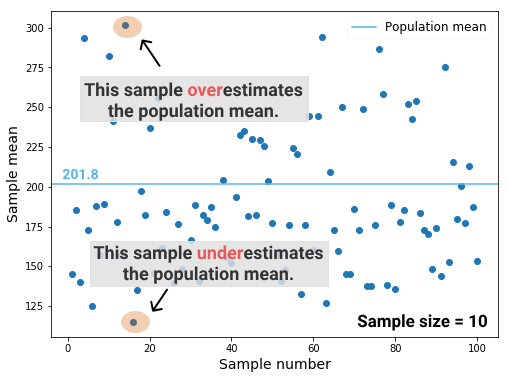

One solution to this problem is to use stratified sampling while being mindful of the proportions in the population. We can stratify our data set by the number of games played, and then sample randomly from each stratum a proportional number of observations.

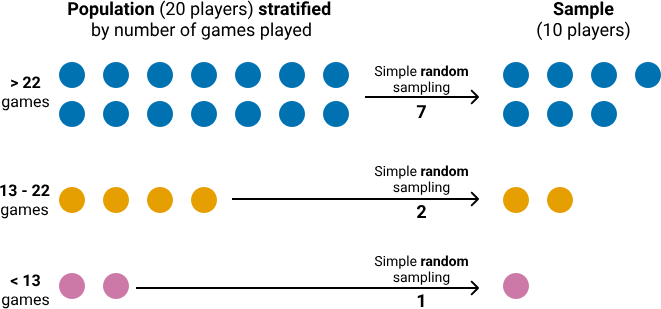

In the diagram above, we can see the following from a population of 20 individuals:

* 14 individuals played more than 22 games.
* 4 individuals played between 13 and 22 games.
* 2 individuals played below 13 games.

Transforming these figures to percentages, 70 percent of the individuals played more than 22 games, 20 percent played between 13 and 22 games, and 10 percent played below 13 games. Because we sampled proportionally, the same percentages (70 percent, 20 percent, 10 percent) are preserved in the sample (even though the absolute values are different): 70 percent played more than 22 games, 20 percent played between 13 and 22 games, and 10 percent played less than 13 games.

### Assignment

Perform stratified sampling on the data set 100 times, and sample strata proportionally.

1) Stratify the dataset by the number of games played in the following way: the first stratum should include players who played 12 games or fewer; the second stratum should players who played more than 12 games but up to 22 (included); the third stratum should include players who played more than 22 games (22 not included).

2) Perform stratified sampling 100 times. For each of the 100 iterations of a for loop, do the following:

    * Sample each stratum proportionally. Sample at random: one sample observation from the first stratum, two sample observations from the second, and seven sample observations from the third stratum (eventually, we'll concatenate these sample observations and calculate the mean of the PTS column).
    * random_state should vary from 0 to 99: 0 for the first iteration, 99 for the final iteration.
    * Once you're done with the sampling for the current iteration of the loop, concatenate all the sample observations into one final sample. You can use pd.concat().
    * Compute the mean of the final sample, and append it to a list defined outside the loop. The mean should be for the PTS column.
    
3) Display the entire sampling process.

    * Using plt.scatter(), display the sampling means on a scatter plot. Place the means on the y-axis and the sample numbers on the x-axis (the numbers should range from 1 to 100 - both endpoints included).
    * Using plt.axhline(), display the population mean for the total points in the form of a horizontal line.
    * Use plt.show() to display the plot.


In [135]:
stratum_1 = wnba[wnba['Games Played'] <= 12]
stratum_2 = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played'] <= 22)]
stratum_3 = wnba[wnba['Games Played'] > 22]

In [136]:
proportional_sampling_means = []

for i in range(100):
    sample_under_12 = stratum_1['PTS'].sample(1, random_state=i)
    sample_13_22 = stratum_2['PTS'].sample(2, random_state=i)
    sample_over_22 = stratum_3['PTS'].sample(7, random_state=i)
    
    final_sample = pd.concat([sample_under_12, sample_13_22, sample_over_22])
    proportional_sampling_means.append(final_sample.mean())

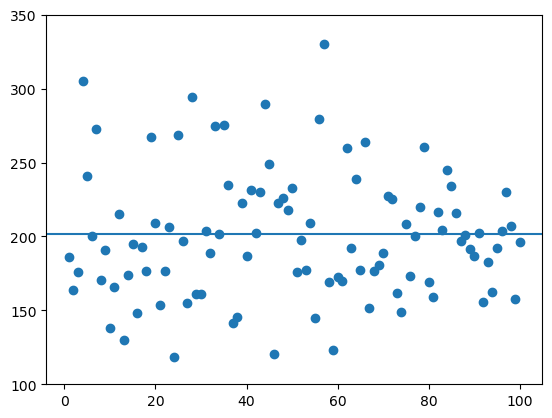

In [137]:
plt.scatter(range(1,101),proportional_sampling_means)
plt.axhline(wnba['PTS'].mean())
plt.ylim([100, 350])
plt.show()

### Code Explanation

It first divides the dataset into three strata based on the number of games played by each player. Then, for each stratum, it takes a random sample of players proportional to the size of the stratum, as specified by the sampling weights provided in the instructions. Finally, it combines the samples from each stratum into a final sample and calculates the mean of the final sample. This process is repeated 100 times, and the means of the final samples are stored in a list called proportional_sampling_means. The code then creates a scatter plot of the means against the sample number and adds a horizontal line representing the mean of the entire population. This allows us to visually compare the means of the final samples to the population mean and assess the effectiveness of the sampling method.

## Choosing the Right Strata

You might not have been impressed by the results we got by sampling proportionally. The variability of the sampling was quite large, and many sample means were unrepresentative, being far from the population mean. In fact, this sampling method doesn't seem to perform better than simple random sampling:

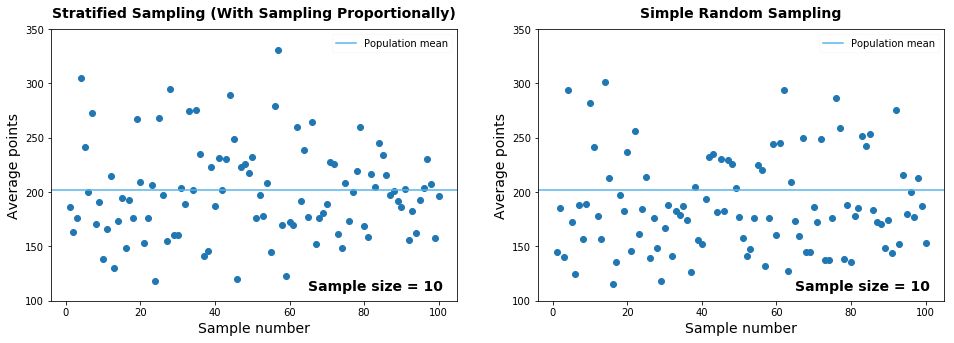

The poor performance is a result of choosing bad strata. We stratified the data by the number of games played, but this isn't a good approach. A player has technically played one game even if she only played for one or two minutes, even though others play 30 or 40 minutes, and it still only qualifies as one game.

It makes more sense to stratify the data by number of minutes played, rather than by number of games played. The minutes played are a much better indicator of how much a player scored in a season than the number of games played.

Our dataset contains the total number of minutes played by each player for the entire season. If we make strata based on minutes played, and then sample proportionally using stratified sampling, we get something visibly better than simple random sampling (especially in terms of variability):

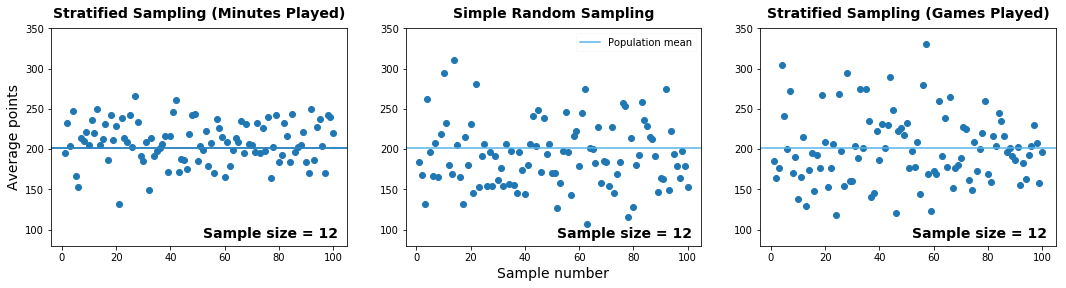

We increased the sample size to 12 so that we can create a better proportional sampling for the strata organized by minutes played.

### Guidelines for choosing a good strata:

1. Minimize the variability within each stratum.

For instance, avoid having in the same stratum a player that has scored 10 points and a player that has scored 500. If the variability is high, it might be a sign that you either need more granular stratification (you need more strata), or you need to change the criterion of stratification (an example of criterion is minutes played).

2. Maximize the variability between strata.

Good strata are different from one another. If you have strata that are similar to one another with respect to what you want to measure, you might need a more granular stratification, or you might need to change the stratification criterion. On the previous screen, stratifying the data by games played resulted in strata that were similar to each other regarding the distribution of the total points. We managed to increase the variability between strata by changing the criterion of stratification to minutes played.

3. The stratification criterion should correlate strongly with the property you're trying to measure.

For instance, the column describing minutes played (the criterion) should correlate strongly with the number of total points (the property we want to measure).

We've left the code editor open for you to experiment with the different sampling methods we've learned so far. One thing you can try is to replicate the last graph above. You can then play with sample sizes and try to get insights into how variability and sampling error change.

### Stratifying by Minutes played

In [138]:
wnba['MIN'].value_counts(bins=4, normalize=True) * 100

(10.993, 263.5]    27.972028
(515.0, 766.5]     25.874126
(263.5, 515.0]     23.776224
(766.5, 1018.0]    22.377622
Name: MIN, dtype: float64

In [139]:
stratum_under_263 = wnba[wnba['MIN'] <= 263.5]
stratum_236_515 = wnba[(wnba['MIN'] > 263.5) & (wnba['MIN'] <= 515)]
stratum_515_766 = wnba[(wnba['MIN'] > 515) & (wnba['MIN'] <= 766.5)]
stratum_over_766 = wnba[wnba['MIN'] > 766.5]

We see that each stratum constitutes approx 25% of the players, so we will increase the sample size to 12 and proportionally sample each stratum,

In [142]:
proportional_sampling_means = []

for i in range(100):
    sample_under_263 = stratum_under_263['PTS'].sample(3, random_state=i)
    sample_236_515 = stratum_236_515['PTS'].sample(3, random_state=i)
    sample_515_766 = stratum_515_766['PTS'].sample(3, random_state=i)
    sample_over_766 = stratum_over_766['PTS'].sample(3, random_state=i)
    
    final_sample = pd.concat([sample_under_263, sample_236_515, sample_515_766, sample_over_766])
    proportional_sampling_means.append(final_sample.mean())

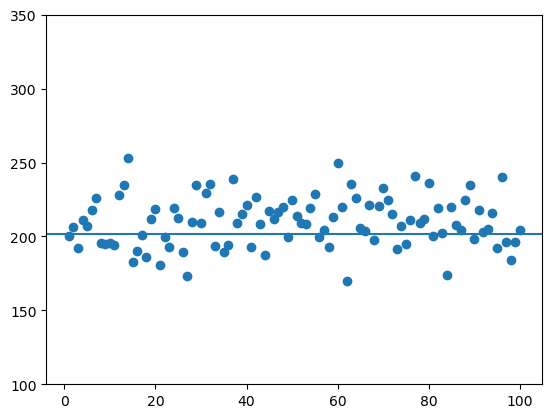

In [143]:
plt.scatter(range(1,101),proportional_sampling_means)
plt.axhline(wnba['PTS'].mean())
plt.ylim([100, 350])
plt.show()

By choosing the minutes played as a strata and slightly increasing the sample size to 12, we have managed to get much better sampling results.

## Cluster Sampling

The dataset we've been working with was scraped from the WNBA's website. The website centralizes data on basketball games and players in the WNBA. Let's suppose for a moment that such a site didn't exist, and the data were instead scattered across each individual team's website. There are twelve unique teams in our data set, which means we'd have to scrape twelve different websites, each of which requires its own scraping script.

This scenario is quite common in the data science workflow: you want to answer some questions about a population, but the data is scattered in such a way that data collection is either time-consuming or close to impossible. For instance, let's say you want to analyze how people review and rate movies as a function of movie budget. There are many websites that can help with data collection, but how can you go about it so that you can spend a day or two on getting the data you need, rather than a month or two?

One way is to list all the data sources you can find, and then randomly pick only a few of them from which to collect. Then you can individually sample each of the sources you've randomly picked. We call this sampling method cluster sampling, and we call each of the individual data sources a cluster.

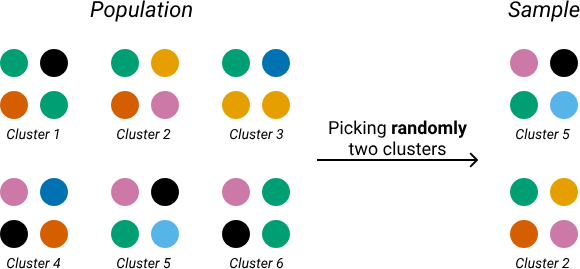


In our case, we'd first list all the possible data sources. Assuming that all the teams in our dataset have a website from which we can take data, we end up with this list of clusters (each team's website is a cluster) :

In [144]:
print(wnba['Team'].unique())

['DAL' 'LA' 'CON' 'SAN' 'MIN' 'SEA' 'PHO' 'CHI' 'WAS' 'NY' 'ATL' 'IND']


Then we need to find a way to randomly pick a few clusters from our listing. There are many ways to do that, but the important thing to keep in mind is that we should avoid picking a cluster twice. Here's one way to sample four clusters randomly:


In [147]:
pd.Series(wnba['Team'].unique()).sample(4, random_state=0)

6     PHO
11    IND
4     MIN
10    ATL
dtype: object

Once we pick the clusters, we move to collecting the data. We can collect all the data from each cluster, but we can also perform sampling on each. It's actually possible to use different sampling methods for different clusters. For instance, we can use stratified sampling on the first two clusters, and simple random sampling on the other two.

### Assignment

Let's simulate a cluster sampling on our data set.

1) Pick four team clusters randomly using the technique we've learned (use random_state = 0).

2) Collect the data from each cluster without sampling the clusters. Create a new DataFrame object that stores the data collected from all clusters.

3) Use the data collected to estimate the mean for the following player attributes:

* Height
* Age
* BMI
* Total points

4) Finally, measure the sampling error of your estimates, and assign the errors to the following variables: sampling_error_height, sampling_error_age, sampling_error_BMI, sampling_error_points.

In [149]:
clusters = pd.Series(wnba['Team'].unique()).sample(4, random_state=0)

In [173]:
clusters

6     PHO
11    IND
4     MIN
10    ATL
dtype: object

In [178]:
cluster_sample = pd.DataFrame()

for cluster in clusters:
    data_collected = wnba[wnba['Team'] == cluster]
    cluster_sample = pd.concat([cluster_sample, data_collected], axis=0)

In [181]:
cluster_sample.columns

Index(['Name', 'Team', 'Pos', 'Height', 'Weight', 'BMI', 'Birth_Place',
       'Birthdate', 'Age', 'College', 'Experience', 'Games Played', 'MIN',
       'FGM', 'FGA', 'FG%', '15:00', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3', 'PPG'],
      dtype='object')

In [183]:
sampling_error_height = wnba['Height'].mean() - cluster_sample['Height'].mean()
sampling_error_age = wnba['Age'].mean() - cluster_sample['Age'].mean()
sampling_error_bmi = wnba['BMI'].mean() - cluster_sample['BMI'].mean()
sampling_error_points = wnba['PTS'].mean() - cluster_sample['PTS'].mean()

print(sampling_error_height, sampling_error_age, sampling_error_bmi, sampling_error_points)

-0.06400121617511445 -1.401337792642142 0.23095444165950596 -27.79674673152934


### Code Explanation

It first selects four random teams from the WNBA dataset and creates a new dataframe called cluster_sample to store the data collected from these teams. Then, it calculates the sampling error for four variables: height, age, BMI, and points. The code uses the mean of these variables for the entire WNBA dataset and the mean of the same variables for the cluster_sample dataframe to calculate the sampling error. Finally, the code stores the sampling errors in the variables sampling_error_height, sampling_error_age, sampling_error_BMI, and sampling_error_points. Overall, the code is correct because it performs the required calculations and stores the results in the correct variables.

## Sampling in Data Science Practice


So far, we've explored a few scenarios where sampling can be useful. There are more situations, however, when a data scientist can use sampling. Let's explore a few.

Let's say you work for an e-commerce company that has a table in a database with more than 10 million rows of online transactions. The marketing team asks you to analyze the data and find categories of customers with a low buying rate, so that they can target their marketing campaigns at the right people. Instead of working with more than 10 million rows at each step of your analysis, you can save a lot of code running time by sampling several hundred rows and performing your analysis on the sample. You can do a simple random sampling, but if you're interested in some categories beforehand, it might be a good idea to use stratified sampling.

Let's consider a different situation. Perhaps you need to collect data from an API that either has a usage limit or isn't free. In this case, you are more or less forced to sample. Knowing how and what to sample can be highly useful.

Another common sampling use case is when the data is scattered across different locations (different websites, different databases, different companies, etc.). As we discussed on the previous screen, cluster sampling would be a great choice in such a scenario.

Sampling is a big topic in statistics, and there are more sampling methods than we've discussed so far.


## Descriptive and Inferential Statistics

Practical statistical analysis revolves entirely around the distinction between a population and a sample. When we're doing statistics in practice, our goal is either to describe a sample or a population or to use a sample to draw conclusions about the population to which it belongs (or a mix of these two goals).

When we describe a sample or a population (by measuring averages, proportions, and other metrics; by visualizing properties of the data through graphs; etc.), we do descriptive statistics.

When we try to use a sample to draw conclusions about a population, we do inferential statistics (we infer information from the sample about the population).

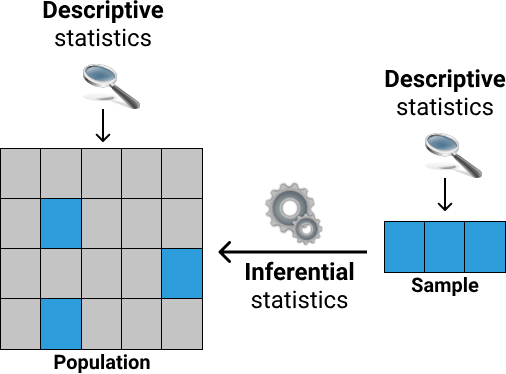

## Next steps

Throughout this lesson, we discussed the details of collecting data for our analysis, and we completed the first part of the workflow we'll cover in this course.

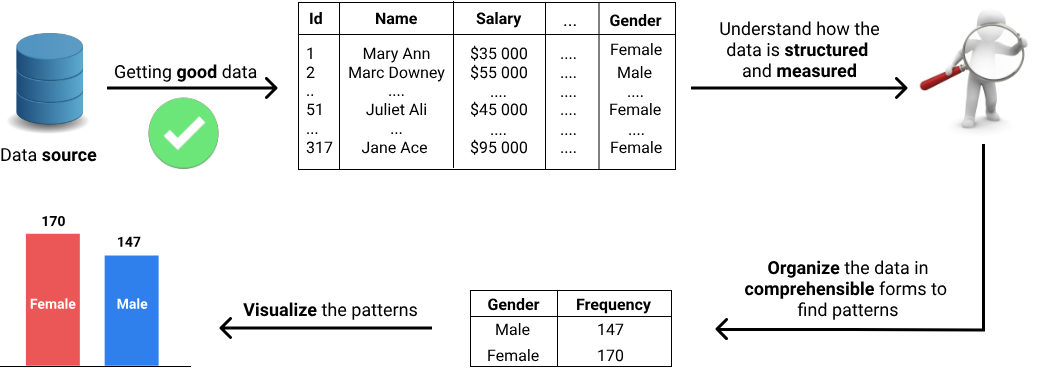

Next in our statistics journey, we'll learn about variables in statistics, how datasets are structured as collections of variables, and how each variable is measured.